## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [0]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [0]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not usefu to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [0]:
#answer below:

absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
ID                                 740 non-null int64
Reason for absence                 740 non-null int64
Month of absence                   740 non-null int64
Day of the week                    740 non-null int64
Seasons                            740 non-null int64
Transportation expense             740 non-null int64
Distance from Residence to Work    740 non-null int64
Service time                       740 non-null int64
Age                                740 non-null int64
Work load Average/day              740 non-null float64
Hit target                         740 non-null int64
Disciplinary failure               740 non-null int64
Education                          740 non-null int64
Son                                740 non-null int64
Social drinker                     740 non-null int64
Social smoker                      740 non-null int64
Pet                          

In [0]:
corrmat_absent = absent.corr()
plt.figure(figsize=(19,19))
sns.heatmap(corrmat_absent, square=True, annot=True, linewidth=.5, cmap = 'coolwarm')
plt.title('correlation matrix (Absent)')
plt.show()

In [0]:
absent_new = absent.drop(['Weight','Age','Transportation expense','ID'],axis=1)
absent_new.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Distance from Residence to Work', 'Service time',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure',
       'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Height',
       'Body mass index', 'Absenteeism time in hours'],
      dtype='object')

Scale the indepdendent variables using the standard scaler

In [0]:
# answer below:
x_cols = [x for x in absent_new.columns if x != 'Absenteeism time in hours']

scaler = StandardScaler()
scaler.fit(absent_new[x_cols])
absent_scale = scaler.transform(absent_new[x_cols])
x_scale = pd.DataFrame(absent_scale, columns=x_cols)
x_scale.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Service time,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Height,Body mass index
0,0.804938,0.196763,-0.643947,-1.390175,0.429556,0.101770,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,-0.019046,0.775932
1,-2.280124,0.196763,-0.643947,-1.390175,-1.121694,1.242825,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.56624,0.975828,1.009438
2,0.448970,0.196763,0.059924,-1.390175,1.441240,1.242825,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.56624,-0.350671,1.009438
3,-1.449530,0.196763,0.763796,-1.390175,-1.661258,0.329981,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.56624,-0.682295,-0.625100
4,0.448970,0.196763,0.763796,-1.390175,0.429556,0.101770,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,-0.019046,0.775932


Split the data into train and test (test proportion=0.2).

In [0]:
# answer below:
y = absent_new['Absenteeism time in hours']
X = x_scale

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [0]:
# answer below:

# svr_linear = SVR(kernel='linear', C=1)
svr_rbf = SVR(kernel='rbf', epsilon = 4, C=31)
svr_rbf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=31, cache_size=200, coef0=0.0, degree=3, epsilon=4,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svr_rbf.score(X_train, y_train), svr_rbf.score(X_test, y_test)

(0.26585868329024054, 0.17906927646015736)

In [0]:
y_test_pred = svr_rbf.predict(X_test)
y_train_pred = svr_rbf.predict(X_train)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

109.0497396381336
240.19044764329487


If you are unhappy with your model's performance, perform a grid search to optimize C.

In [0]:
c_range = np.logspace(-3, 5, num=9)
c_range

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])

In [0]:
# answer below:
params = {'kernel': ['linear', 'rbf'], 'C': range(30, 35, 1),'epsilon': [3, 4, 5]} 
grid = GridSearchCV(svr_rbf, param_grid=params, cv=3, return_train_score=True, n_jobs=-1)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'C': 31, 'epsilon': 4, 'kernel': 'rbf'}
0.13304515549084833


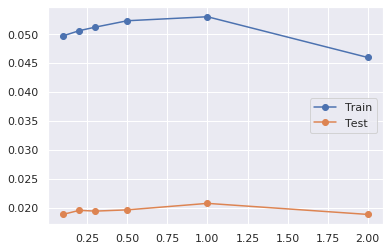

In [0]:
cv_r = pd.DataFrame(grid.cv_results_)
plt.plot(cv_r['param_epsilon'], cv_r['mean_train_score'], 'o-', label='Train')
plt.plot(cv_r['param_epsilon'], cv_r['mean_test_score'], 'o-', label='Test')
plt.legend()
plt.show()